#**📚 Import All The Library**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# **📊 Football Team Price Prediction Project**

# 💾 **Step1: Load**


In [37]:
# Load the dataset
df = pd.read_csv("football_team_prices.csv")

#**🔍 Step 2: Explore Data**

##*Dataset Head*


In [38]:

df.head()

Team_Name  Market_Value   Squad_Cost  Player_Average_Value  \
0    Team_0    405.813113   288.255927             18.892767   
1    Team_1    953.178591   871.598725             60.134692   
2    Team_2    745.394245  1029.112777             31.290961   
3    Team_3    618.725560   461.038518             23.486016   
4    Team_4    198.217708   327.120537              9.350029   

   Highest_Valued_Player  Total_Wages  Transfer_Spending  Transfer_Revenue  \
0              76.012853    75.792389          31.590439         20.468918   
1             173.390608   318.153820          60.009681         30.930230   
2             112.216365   222.166563         107.929223         10.203721   
3             106.165681   122.253287         171.775016         66.533768   
4              20.613250    94.757013          45.128434        148.393401   

   Net_Spending  Revenue_Generation        Price  
0     11.121521          309.964906   324.426307  
1     29.079452          595.208847  1084.352678  
2     97.725502          581.667522   823.160038  
3    105.241248          660.179283   622.173517  
4   -103.264966          171.116466   216.801507

## *Dataset Info*

In [39]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team_Name              5000 non-null   object 
 1   Market_Value           5000 non-null   float64
 2   Squad_Cost             5000 non-null   float64
 3   Player_Average_Value   5000 non-null   float64
 4   Highest_Valued_Player  5000 non-null   float64
 5   Total_Wages            5000 non-null   float64
 6   Transfer_Spending      5000 non-null   float64
 7   Transfer_Revenue       5000 non-null   float64
 8   Net_Spending           5000 non-null   float64
 9   Revenue_Generation     5000 non-null   float64
 10  Price                  5000 non-null   float64
dtypes: float64(10), object(1)
memory usage: 429.8+ KB


##*Dataset Describe*

In [40]:

df.describe()

Market_Value   Squad_Cost  Player_Average_Value  Highest_Valued_Player  \
count   5000.000000  5000.000000           5000.000000            5000.000000   
mean     521.990391   516.880195             23.915219              84.140636   
std      275.151969   321.079500             13.689527              53.839221   
min       50.011053   -91.379400              1.775195               3.808273   
25%      281.669666   258.760206             12.465559              40.683971   
50%      525.008194   470.017603             23.090107              76.668334   
75%      760.695819   728.542694             33.360944             117.074040   
max      999.731790  1546.214809             65.972867             312.084991   

       Total_Wages  Transfer_Spending  Transfer_Revenue  Net_Spending  \
count  5000.000000        5000.000000       5000.000000   5000.000000   
mean    154.736384         104.689447         77.418555     27.270893   
std     102.959307          54.676124         42.115393     68.548754   
min     -21.732315          10.001052          5.086240   -138.535632   
25%      74.249215          56.768339         41.323790    -23.147298   
50%     136.470389         105.131415         77.000057     28.642378   
75%     216.016561         150.817797        114.588119     76.649030   
max     600.345840         199.959981        149.984132    186.581740   

       Revenue_Generation        Price  
count         5000.000000  5000.000000  
mean           468.239770   457.203795  
std            266.556422   265.817761  
min             31.831594  -210.992951  
25%            242.923429   246.603200  
50%            450.031398   453.820371  
75%            660.757128   662.923759  
max           1195.245345  1170.211906

##*Dataset Dtypes*

In [41]:

df.dtypes

Team_Name                 object
Market_Value             float64
Squad_Cost               float64
Player_Average_Value     float64
Highest_Valued_Player    float64
Total_Wages              float64
Transfer_Spending        float64
Transfer_Revenue         float64
Net_Spending             float64
Revenue_Generation       float64
Price                    float64
dtype: object

#*Dataset Null Values*

In [42]:

df.isnull().sum()

Team_Name                0
Market_Value             0
Squad_Cost               0
Player_Average_Value     0
Highest_Valued_Player    0
Total_Wages              0
Transfer_Spending        0
Transfer_Revenue         0
Net_Spending             0
Revenue_Generation       0
Price                    0
dtype: int64

#**📊 Step 3: Dataset Visualization**


##*Feature Correlation Heatmap*


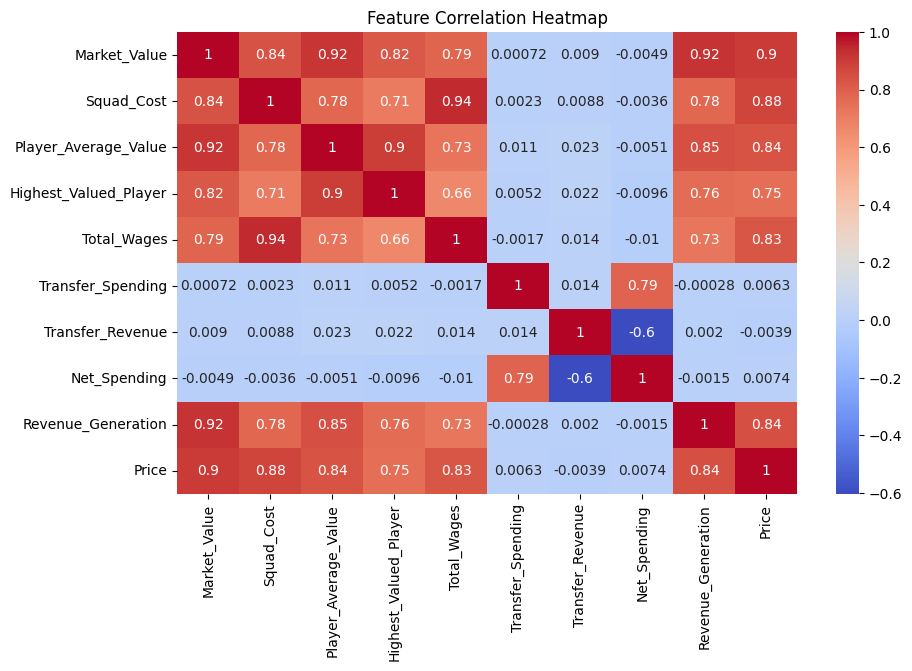

In [43]:
df_numeric=df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## *Distribution of Target Variable*

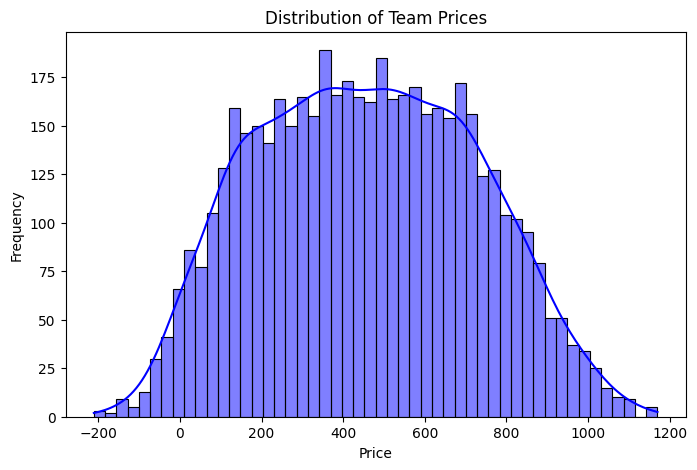

In [44]:

plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=50, kde=True, color='blue')
plt.title("Distribution of Team Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## *Boxplot of Team Prices*

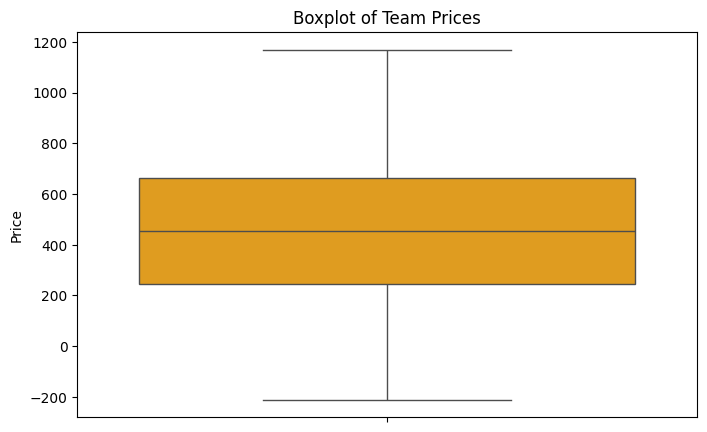

In [45]:

plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Price"], color='orange')
plt.title("Boxplot of Team Prices")
plt.ylabel("Price")
plt.show()

## *Scatter plots for Price vs Features*

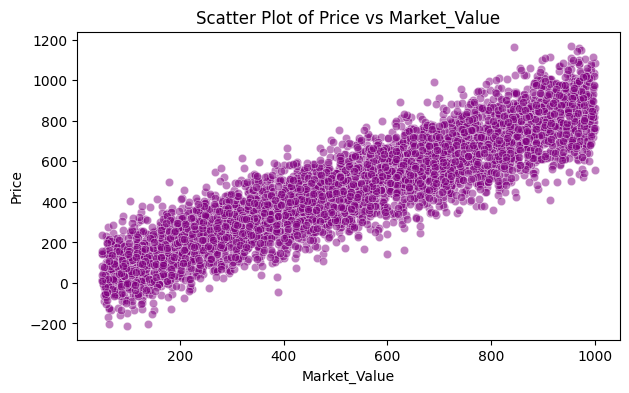

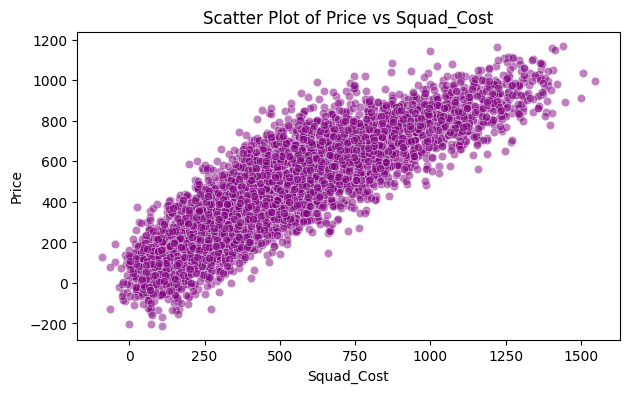

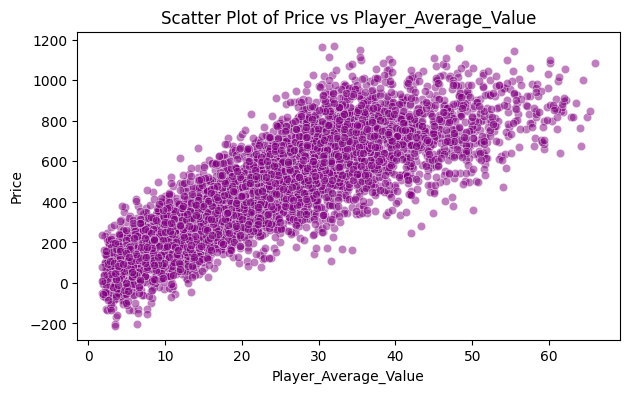

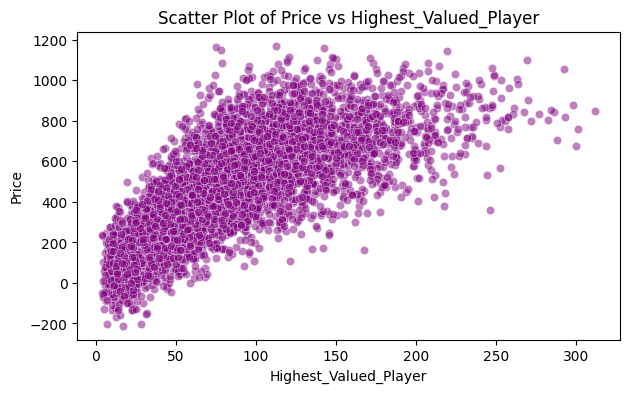

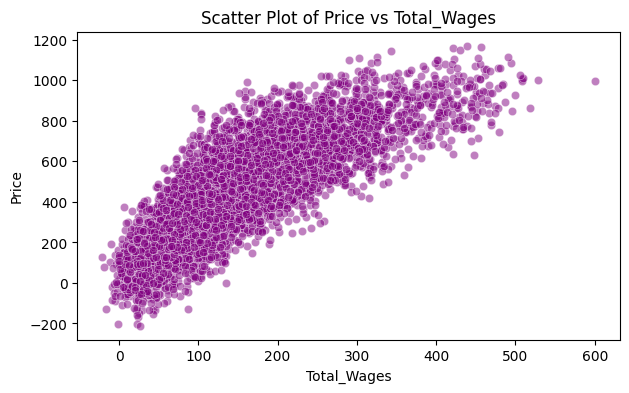

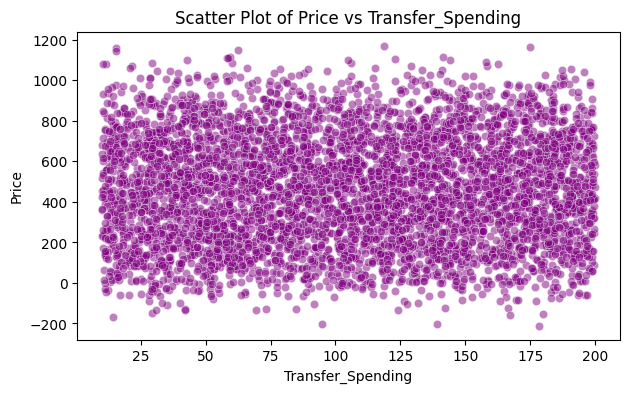

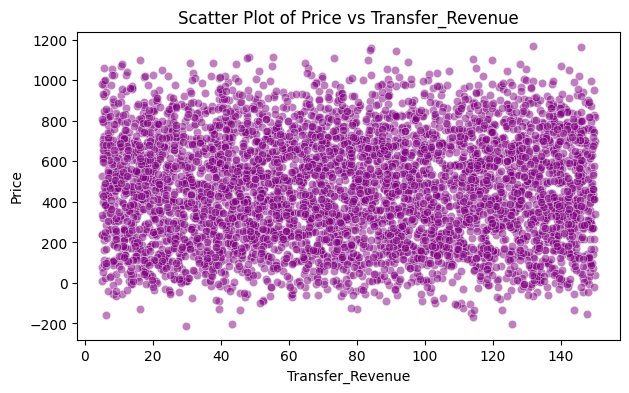

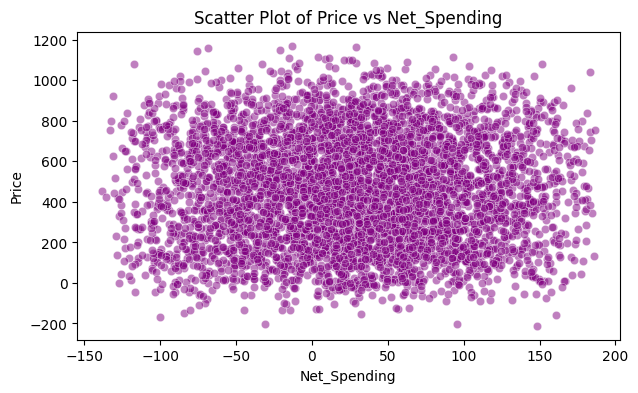

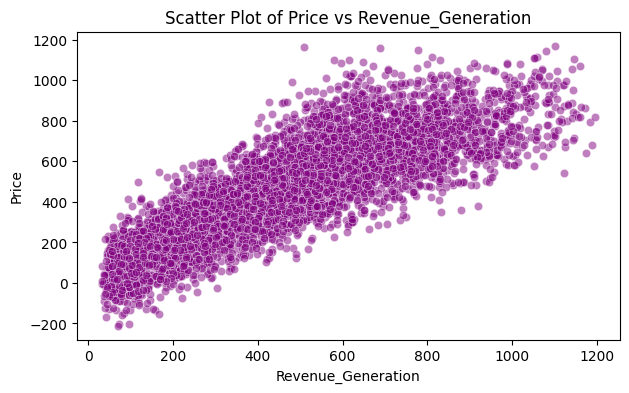

In [46]:
# Scatter plots for Price vs Features
for column in df.columns:
    if column not in ["Team_Name", "Price"]:
        plt.figure(figsize=(7, 4))
        sns.scatterplot(x=df[column], y=df["Price"], alpha=0.5, color='purple')
        plt.title(f"Scatter Plot of Price vs {column}")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()



##*KDE plot to show density estimation*

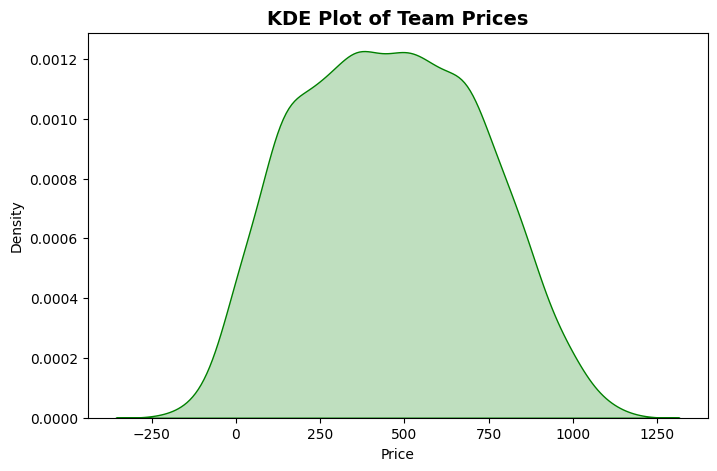

In [47]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Price"], fill=True, color='green')
plt.title("KDE Plot of Team Prices", fontsize=14, fontweight='bold')
plt.xlabel("Price")
plt.show()

##*Scatter plots for Price vs Features*

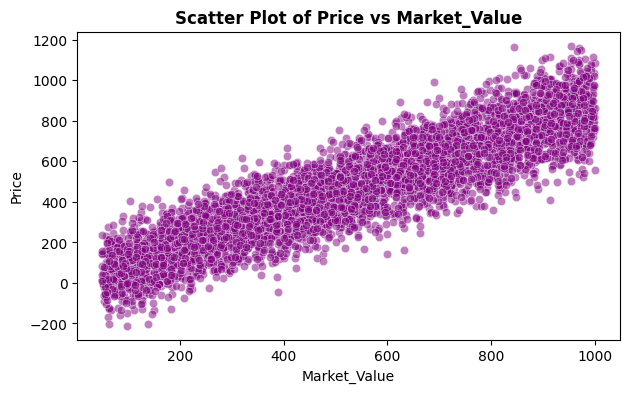

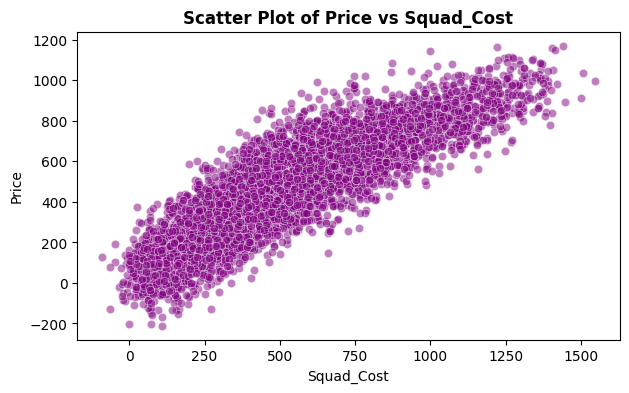

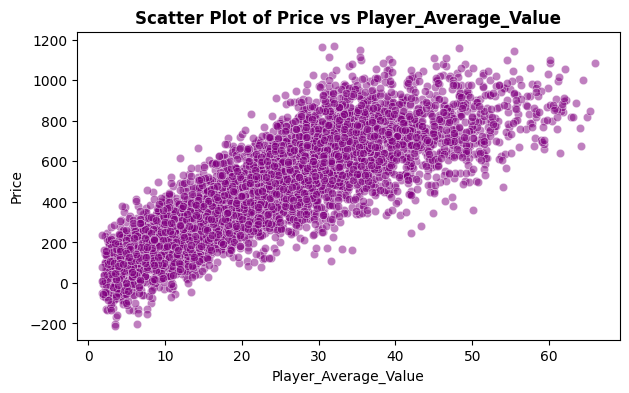

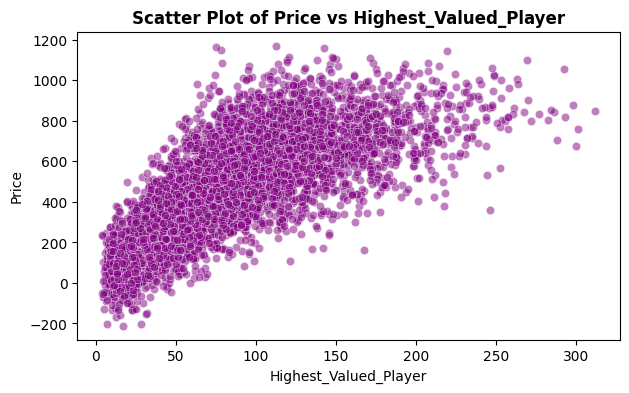

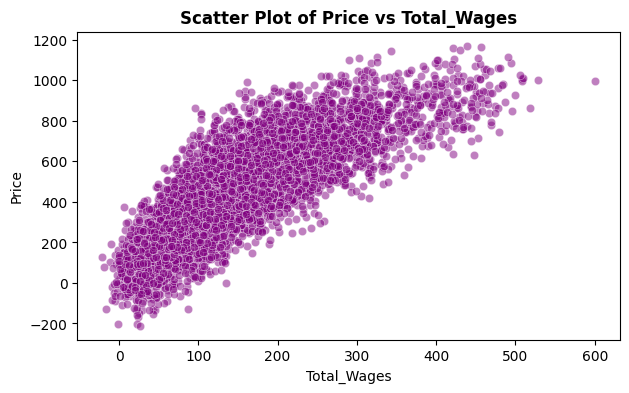

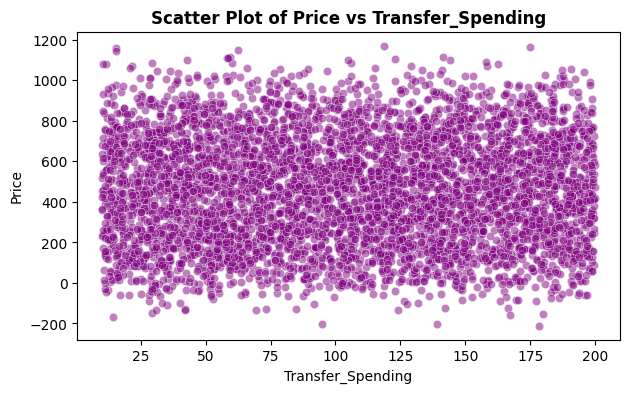

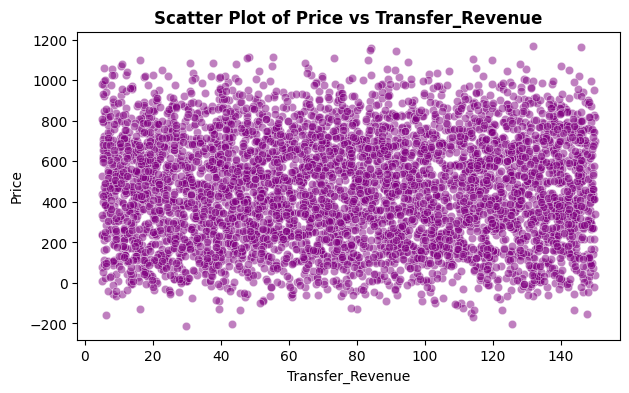

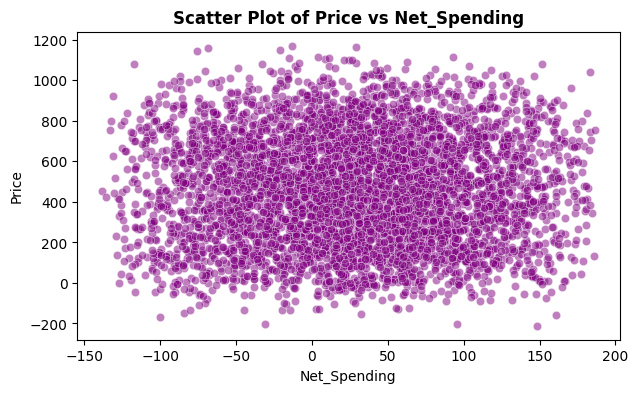

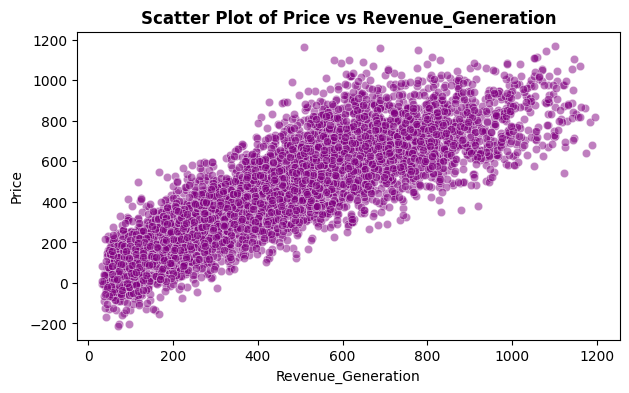

In [48]:
for column in df.columns:
    if column not in ["Team_Name", "Price"]:
        plt.figure(figsize=(7, 4))
        sns.scatterplot(x=df[column], y=df["Price"], alpha=0.5, color='purple')
        plt.title(f"Scatter Plot of Price vs {column}", fontsize=12, fontweight='bold')
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()

#**🧹🪣 Step 4: Data Preprocessing**

##*Removing Duplicated*

In [49]:
df.duplicated().sum()  # Counts duplicate rows
df.drop_duplicates(inplace=True)

##*Removing Missing Value*

In [50]:
df.dropna(inplace=True)


##*Data Preprocessing*

In [51]:
X = df.drop(columns=["Team_Name", "Price"])
y = df["Price"]

##*✂️ Data Train-test Split*

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##*📏 Standardization*

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**📈 Step 5: Model Training**

In [54]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

#**📝 Step 6: Model Evaluation**

##*Predicting Test Data*

In [55]:

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##*Evaluting Metrics*

In [56]:

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.8602
Mean Absolute Error: 78.82
Mean Squared Error: 9676.72
Root Mean Squared Error: 98.37


#**🎯 Step 7: Visualization of Prediction**

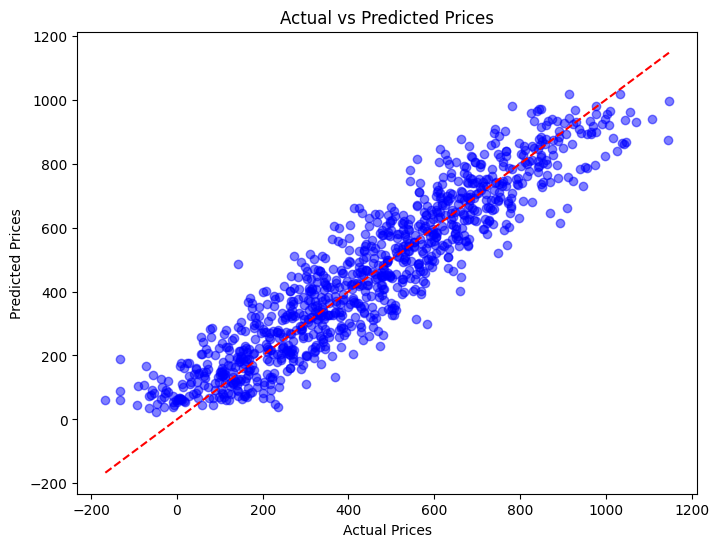

In [57]:
# Step 5: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.show()